# **Import Library**

In [1]:
#Menampilkan Grafik
import matplotlib.pyplot as plt
import seaborn as sns

#Data Transformation
import pandas as pd
import numpy as np

#Membantu dalam pembuatan model dan mempersiapkan data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

#Model yang digunakan
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

#Magic line untuk matplotlib
%matplotlib inline

# **Data Transformation**

In [2]:
#Membaca data
data_stunting = pd.read_excel(r'data/Stunting.xlsx')

In [3]:
#Didalam data terdapat beberapa char non-ascii jadi di hilangkan dahulu
data_stunting = data_stunting.applymap(lambda x : x.replace('\xa0', '') if type(x) == str else x)

data_stunting.sample(10)

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
204,5305424503199777,MARISKA OELEU,P,2019-03-05,2.9,49,MARKUS OELEU,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.65,Sangat Pendek,-3.27,Gizi Baik,0.47,T,0,NaN,-,-
55,5305422108190001,QRITANTO L. NAIKOSAT,L,2019-08-21,2.7,NaN,GAYUS KOSAT,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.15,Pendek,-2.95,Gizi Baik,-0.71,N,0,1.0,-,-
178,5305425209180001,ALEXANDRA S. HALA,P,2018-09-12,2.2,NaN,YOHANES HALA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-3.29,Pendek,-2.86,Gizi Kurang,-2.26,N,0,1.0,-,-
242,5305421306207859,BENEDIKTUS A. NAIOBE,L,2020-06-13,3.3,49,TOBIAS NAIOBE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.05,Pendek,-2.70,Gizi Baik,-1.04,N,0,NaN,-,-
220,5305423110191693,OKTOVIANUS TNAAUNI,L,2019-10-31,2.8,NaN,MARTINUS MORUK,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.80,Pendek,-2.21,Gizi Kurang,-2.30,N,0,1.0,-,-
254,5305424704217196,BY TOKEN,P,2021-04-07,2.8,48,YOHANES LEU,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-0.51,Pendek,-2.48,Risiko Gizi Lebih,1.14,T,-,1.0,-,-
74,5305420212170000,DERI K. MALAFU,L,2017-12-02,2.5,0,SILFINUS NEONNUB,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.34,Pendek,-2.18,Gizi Baik,-0.03,N,0,1.0,-,-
135,6707184980,HERLISTA NAITILI,P,2018-07-27,2.6,48,FREDERIKUS NAITILI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.26,Pendek,-2.05,Gizi Baik,-1.54,N,0,1.0,-,-
132,5305420404180001,ALVANO NAILAKE,L,2018-04-04,2.4,NaN,ADOLFUS NAILAKE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.63,Pendek,-2.45,Gizi Baik,-1.87,N,0,1.0,-,-
263,5305421311215503,RADIKA OBET OEMATAN,L,2021-11-13,2.1,0,JHON OEMATAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-3.91,Pendek,-2.55,Gizi Kurang,-2.83,T,-,1.0,-,-


In [4]:
#Melihat sekilas tentang data
data_stunting.describe()

,RT,RW,Berat,Tinggi,LiLA,ZS BB/U,ZS TB/U,ZS BB/TB,Jml Vit A
count,193.000000,193.000000,311.000000,311.000000,285.000000,311.000000,311.000000,311.000000,286.0
mean,4.590674,1.953368,10.522508,84.482315,13.384561,-2.296238,-2.652251,-1.118907,1.0
std,4.171245,1.585383,2.116359,9.177359,3.224342,0.741115,0.527704,0.900088,0.0
min,0.000000,0.000000,3.000000,49.700000,0.000000,-5.860000,-5.640000,-3.000000,1.0
25%,2.000000,1.000000,9.200000,79.200000,13.200000,-2.785000,-2.900000,-1.720000,1.0
50%,4.000000,2.000000,10.600000,85.300000,14.000000,-2.250000,-2.530000,-1.130000,1.0
75%,6.000000,2.000000,12.000000,91.100000,14.700000,-1.810000,-2.255000,-0.580000,1.0
max,21.000000,8.000000,15.900000,99.600000,17.800000,0.390000,-2.020000,2.380000,1.0


In [5]:
#Melihat info data
data_stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NIK                 311 non-null    object 
 1   Nama                311 non-null    object 
 2   JK                  311 non-null    object 
 3   Tgl Lahir           311 non-null    object 
 4   BB Lahir            311 non-null    object 
 5   TB Lahir            217 non-null    object 
 6   Nama Ortu           311 non-null    object 
 7   Prov                311 non-null    object 
 8   Kab/Kota            311 non-null    object 
 9   Kec                 311 non-null    object 
 10  Pukesmas            311 non-null    object 
 11  Desa/Kel            311 non-null    object 
 12  Posyandu            311 non-null    object 
 13  RT                  193 non-null    float64
 14  RW                  193 non-null    float64
 15  Alamat              311 non-null    object 
 16  Usia Saa

In [6]:
#Melihat data yang tidak ada nilainya atau null
data_stunting.isna().sum()

NIK                     0
Nama                    0
JK                      0
Tgl Lahir               0
BB Lahir                0
TB Lahir               94
Nama Ortu               0
Prov                    0
Kab/Kota                0
Kec                     0
Pukesmas                0
Desa/Kel                0
Posyandu                0
RT                    118
RW                    118
Alamat                  0
Usia Saat Ukur          0
Tanggal Pengukuran      0
Berat                   0
Tinggi                  0
LiLA                   26
BB/U                    0
ZS BB/U                 0
TB/U                    0
ZS TB/U                 0
BB/TB                   0
ZS BB/TB                0
Naik Berat Badan        0
PMT Diterima (kg)       0
Jml Vit A              25
KPSP                    1
KIA                     0
dtype: int64

In [7]:
#Untuk mengubah data kategorical menjadi angka
le = LabelEncoder()

data_stunting['BB/U'] = le.fit_transform(data_stunting['BB/U']) #Kurang , Berat Badan Normal
data_stunting['TB/U'] = le.fit_transform(data_stunting['TB/U']) #Sangat Pendek, Pendek
data_stunting['BB/TB'] = le.fit_transform(data_stunting['BB/TB']) #Gizi Baik, Risiko Gizi Lebih

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,0,0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,0,0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,0,0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [8]:
#Mengubah value 0 pada BB Lahir menjadi median
data_stunting['BB Lahir'] = pd.to_numeric(data_stunting['BB Lahir'])
data_stunting['BB Lahir'] = data_stunting['BB Lahir'].apply(lambda x : data_stunting['BB Lahir'].median() if x <= 0 else x)

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,2.8,0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,2.8,0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,2.8,0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [9]:
#Mengubah value 0 pada TB Lahir menjadi median
data_stunting['TB Lahir'] = pd.to_numeric(data_stunting['TB Lahir'])
data_stunting['TB Lahir'] = data_stunting['TB Lahir'].apply(lambda x : data_stunting['TB Lahir'].median() if x <= 0 else x)
data_stunting['TB Lahir'].fillna(data_stunting['TB Lahir'].median(), inplace=True)

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48.0,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,2.8,47.0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,2.8,47.0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,2.8,47.0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,47.0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [10]:
#Mengubah value usia menjadi sebuah angka
data_stunting['Usia Saat Ukur'] = data_stunting['Usia Saat Ukur'].apply(lambda x : float(x[0]))

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48.0,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,2.8,47.0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,2.8,47.0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,2.8,47.0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,47.0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [11]:
#Memilih kolom yang mempengaruhi data
data_stunting = data_stunting[['BB Lahir', 'TB Lahir', 'Usia Saat Ukur', 'Berat', 'Tinggi', "BB/U", "TB/U", "BB/TB"]]

data_stunting.head()

,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,BB/U,TB/U,BB/TB
0,2.9,48.0,4.0,11.2,89.0,1,1,0
1,2.8,47.0,4.0,14.2,89.8,0,1,3
2,2.8,47.0,3.0,11.4,90.6,1,0,0
3,2.8,47.0,4.0,12.3,97.8,1,0,0
4,2.8,47.0,3.0,12.1,90.8,0,0,0


# **Modeling**

In [12]:
#Plotting akurasi model
def plot_acc(scores, title, kfold, metrics):
    plt.plot([x for x in range(kfold)], scores, marker='o')
    plt.title(title + metrics)
    plt.ylabel(metrics)
    plt.xlabel('K Fold')
    plt.xticks([x for x in range(kfold)])
    plt.show()

#Plotting confusion matrix model
def plot_cf(pred, title):
    cf = confusion_matrix(pred, y)
    sns.heatmap(cf, annot=True, cmap='Blues', fmt='g').set(title='Confusion Matrix ' + title)

#Plotting hasil model
def cv_score(model, X, y, title, cv=10, metrics='accuracy'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=metrics)
    pred = cross_val_predict(model, X, y, cv=cv)

    print("-"*50)
    print("Accuracy Mean " + title + " : {}%".format(round(scores.mean(), 2) * 100))
    print("Max Accuracy at {} KFold with {}% ".format(np.argmax(scores), round(scores[np.argmax(scores)], 2) * 100) + metrics)
    print("Classification Report : \n" + classification_report(y, pred))
    print("-"*50)

    print("\n")

    plot_acc(scores, title, cv, metrics)

    plot_cf(pred, title)

In [13]:
#Standarisasi pada fitur data
sc = StandardScaler()
mms = MinMaxScaler()

#Slicing data
X = data_stunting.drop('TB/U', axis=1) #data fitur
y = data_stunting['TB/U'] #target
cv = 10
metrics = 'f1'

# Hasilnya jadi 1, sebaiknya tidak digunakan ?

# Standard Scaler
# X = sc.fit_transform(data_stunting)

# Min Max Scaler
# X = mms.fit_transform(data_stunting)

In [14]:
#Model Support Vector Machine
svc = SVC(class_weight='balanced')

#Model Stochastic Gradient Descent
sgdc = SGDClassifier(class_weight='balanced')

#Model K Nearest Neighbors
knc = KNeighborsClassifier()

#Model Multinomial Naive Bayes
mnb = MultinomialNB()

#Model Decision Tree
dtc = DecisionTreeClassifier(class_weight='balanced')

#Model Random Forest
rfc = RandomForestClassifier(class_weight='balanced')

#Model Ada Boost
abc = AdaBoostClassifier()

**Support Vector Machine**

--------------------------------------------------
Accuracy Mean SVC : 40.0%
Max Accuracy at 6 KFold with 80.0% f1
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       250
           1       0.28      0.54      0.37        61

    accuracy                           0.63       311
   macro avg       0.57      0.60      0.55       311
weighted avg       0.74      0.63      0.67       311

--------------------------------------------------




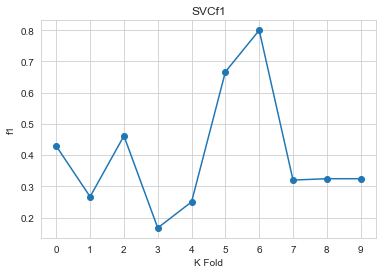

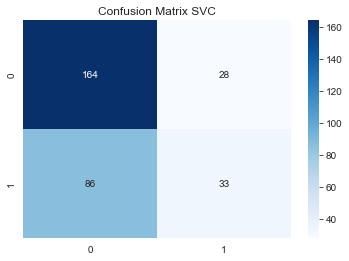

In [15]:
cv_score(svc, X, y, "SVC", cv=cv, metrics=metrics)

**Stochastic Gradient Descent**

--------------------------------------------------
Accuracy Mean SGDC : 24.0%
Max Accuracy at 4 KFold with 63.0% f1
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.38      0.52       250
           1       0.21      0.66      0.31        61

    accuracy                           0.44       311
   macro avg       0.51      0.52      0.42       311
weighted avg       0.70      0.44      0.48       311

--------------------------------------------------




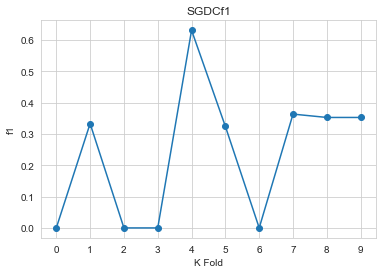

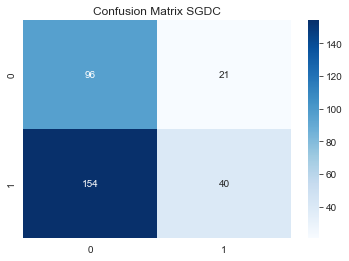

In [16]:
cv_score(sgdc, X, y, "SGDC", cv=cv, metrics=metrics)

**K Nearest Neighbors**

--------------------------------------------------
Accuracy Mean KNC : 28.000000000000004%
Max Accuracy at 5 KFold with 67.0% f1
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       250
           1       0.50      0.21      0.30        61

    accuracy                           0.80       311
   macro avg       0.67      0.58      0.59       311
weighted avg       0.77      0.80      0.77       311

--------------------------------------------------




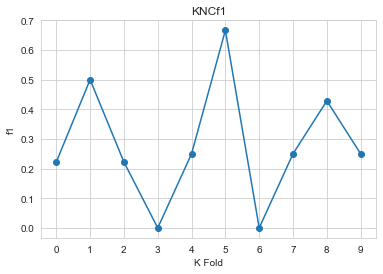

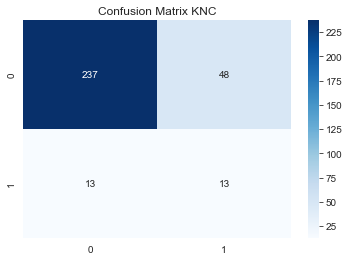

In [17]:
cv_score(knc, X, y, "KNC", cv=cv, metrics=metrics)

**Multinomial Naive Bayes**

--------------------------------------------------
Accuracy Mean MNB : 13.0%
Max Accuracy at 9 KFold with 55.00000000000001% f1
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       250
           1       0.54      0.11      0.19        61

    accuracy                           0.81       311
   macro avg       0.68      0.55      0.54       311
weighted avg       0.76      0.81      0.75       311

--------------------------------------------------




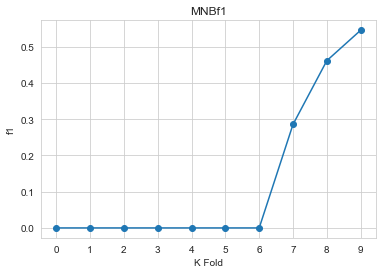

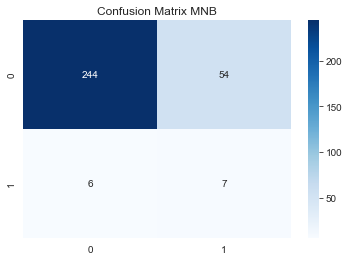

In [18]:
cv_score(mnb, X, y, "MNB", cv=cv, metrics=metrics)

**Decision Tree**

--------------------------------------------------
Accuracy Mean DTC : 60.0%
Max Accuracy at 5 KFold with 83.0% f1
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       250
           1       0.54      0.61      0.57        61

    accuracy                           0.82       311
   macro avg       0.72      0.74      0.73       311
weighted avg       0.83      0.82      0.82       311

--------------------------------------------------




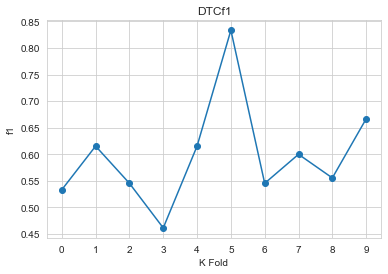

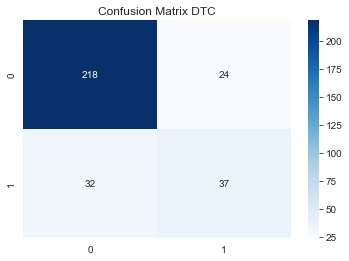

In [19]:
cv_score(dtc, X, y, "DTC", cv=cv, metrics=metrics)

**Random Forest**

--------------------------------------------------
Accuracy Mean RFC : 41.0%
Max Accuracy at 5 KFold with 83.0% f1
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       250
           1       0.66      0.34      0.45        61

    accuracy                           0.84       311
   macro avg       0.76      0.65      0.68       311
weighted avg       0.82      0.84      0.81       311

--------------------------------------------------




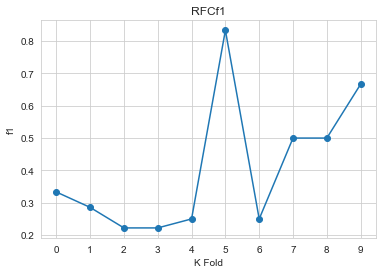

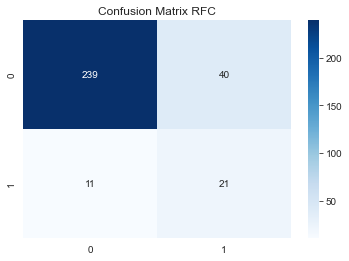

In [20]:
cv_score(rfc, X, y, "RFC", cv=cv, metrics=metrics)

**Ada Boost**

--------------------------------------------------
Accuracy Mean ABC : 48.0%
Max Accuracy at 5 KFold with 77.0% f1
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       250
           1       0.67      0.43      0.52        61

    accuracy                           0.85       311
   macro avg       0.77      0.69      0.71       311
weighted avg       0.83      0.85      0.83       311

--------------------------------------------------




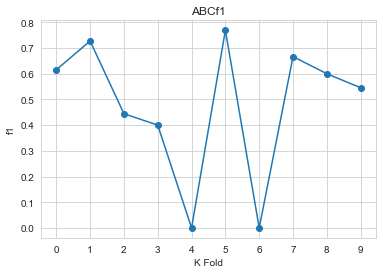

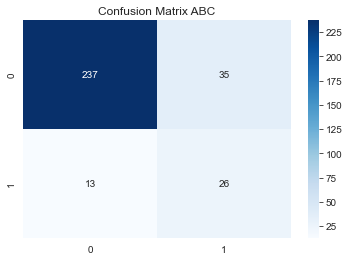

In [21]:
cv_score(abc, X, y, "ABC", cv=cv, metrics=metrics)